# 1 Get the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
datasets.load_diabetes()

diabetes = datasets.load_diabetes()


C:\Users\emekamichael\AppData\Local\Temp\ipykernel_13740\1986097577.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ModuleNotFoundError: No module named 'sklearn'

# 2 FRAME THE PROBLEM
### We want to create few models and choose the best out of them that can predict the risk of diabetes progression from a given dataset. Our model will serve as a screening tool to help doctors identify patients at risk. 

# 3 EDA
### Describe,explore and provide insights using statistics, histogram and 1 correlation martix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

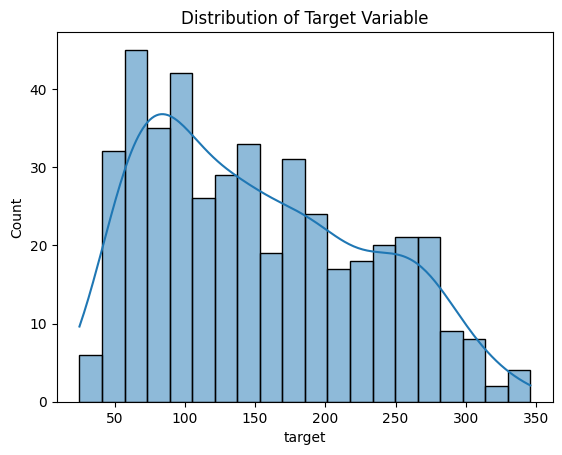

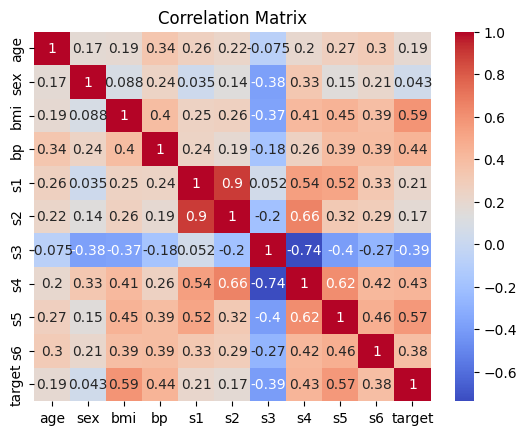

In [ ]:


# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Convert to a pandas DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable
df['target'] = diabetes.target

# Display basic information about the dataset
print(df.info())

# Display descriptive statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.histplot(df['target'], bins=20, kde=True)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 4 Clean the data

### I checked for missing data in the dataset above by checking for missing values.
### Few of the reasons why I clean my data to ensure that it does not contain missing values as stated above,
### Also To ensure consistency in terms of format that data is read and interpreted.


# 5 Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (309, 10) (309,)
Validation set: (66, 10) (66,)
Test set: (67, 10) (67,)


# 6 
### Run a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) 

Degree 0: Mean Squared Error = 5929.88


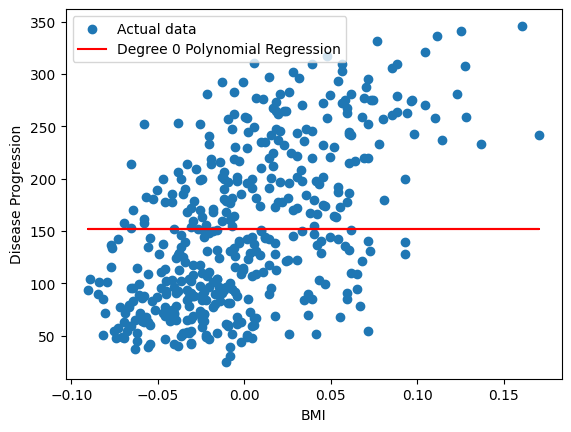

Degree 1: Mean Squared Error = 3890.46


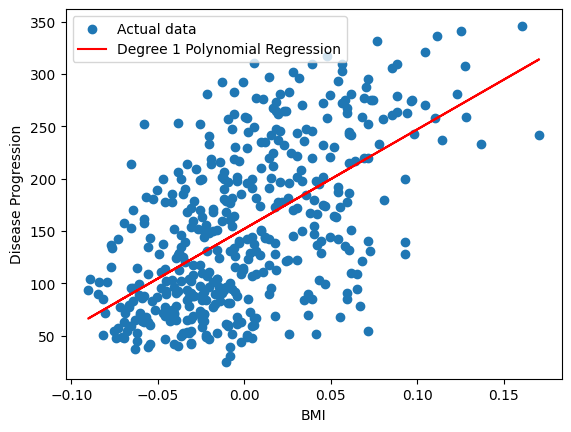

Degree 2: Mean Squared Error = 3889.70


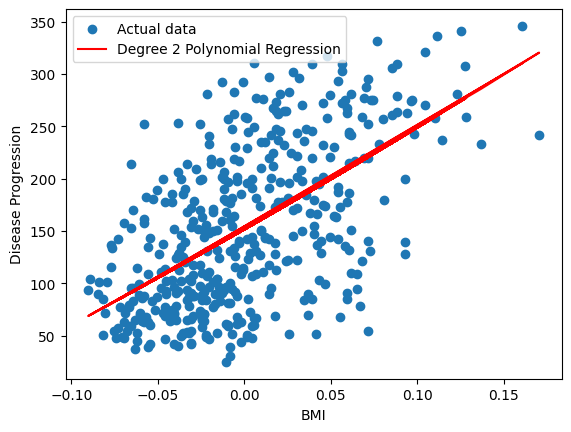

Degree 3: Mean Squared Error = 3883.35


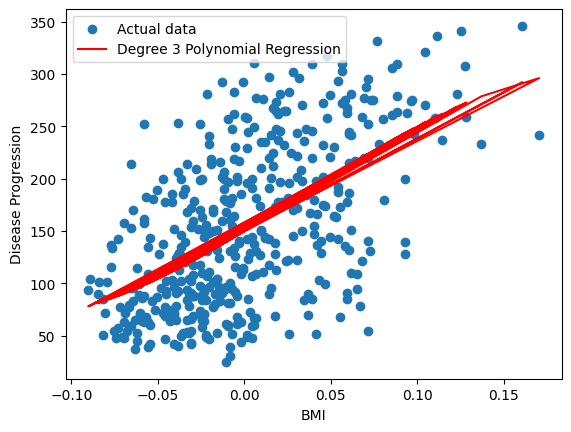

Degree 4: Mean Squared Error = 3880.55


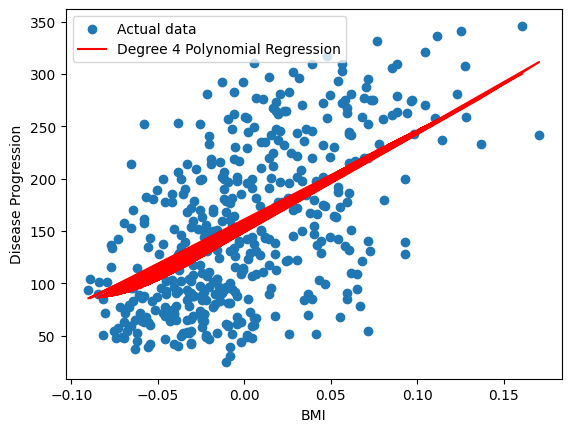

Degree 5: Mean Squared Error = 3858.09


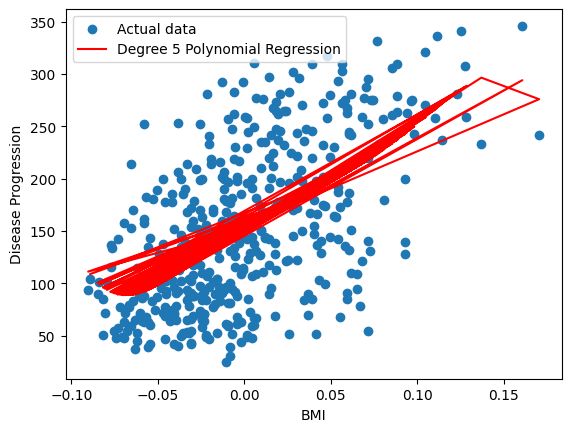

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X_bmi = df[['bmi']].values
y = df['target'].values
degrees = np.arange(6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_bmi)
    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    mse = mean_squared_error(y, y_pred)
    print(f"Degree {degree}: Mean Squared Error = {mse:.2f}")

    # Plot the regression line
    plt.scatter(X_bmi, y, label='Actual data')
    plt.plot(X_bmi, y_pred, label=f'Degree {degree} Polynomial Regression', color='red')
    plt.xlabel('BMI')
    plt.ylabel('Disease Progression')
    plt.legend()
    plt.show()


# 7.1 Report R-squared, MAPE and MAE. You should have 6 values per model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

X_bmi = df[['bmi']].values
y = df['target'].values

degrees = np.arange(6)

metrics_train = {'R2': [], 'MAPE': [], 'MAE': []}
metrics_val = {'R2': [], 'MAPE': [], 'MAE': []}

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_bmi)

    
    X_train_poly, X_val_poly, y_train, y_val = train_test_split(X_poly, y, test_size=0.15, random_state=42)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    
    y_train_pred = model.predict(X_train_poly)
    y_val_pred = model.predict(X_val_poly)

    r2_train = r2_score(y_train, y_train_pred)
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mae_train = mean_absolute_error(y_train, y_train_pred)

    r2_val = r2_score(y_val, y_val_pred)
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    mae_val = mean_absolute_error(y_val, y_val_pred)

    metrics_train['R2'].append(r2_train)
    metrics_train['MAPE'].append(mape_train)
    metrics_train['MAE'].append(mae_train)

    metrics_val['R2'].append(r2_val)
    metrics_val['MAPE'].append(mape_val)
    metrics_val['MAE'].append(mae_val)

for degree in degrees:
    print(f"Degree {degree}:")
    print("Training - R2:", metrics_train['R2'][degree], "MAPE:", metrics_train['MAPE'][degree], "MAE:", metrics_train['MAE'][degree])
    print("Validation - R2:", metrics_val['R2'][degree], "MAPE:", metrics_val['MAPE'][degree], "MAE:", metrics_val['MAE'][degree])
    print()


Degree 0:
Training - R2: 0.0 MAPE: 62.8192941958706 MAE: 66.17962666666666
Validation - R2: -0.007057113402682447 MAPE: 61.23328799586582 MAE: 64.17420895522389

Degree 1:
Training - R2: 0.3648191389959061 MAPE: 47.27586276386887 MAE: 51.01379542259125
Validation - R2: 0.20480706463414322 MAPE: 48.5188079227718 MAE: 54.87037630110812

Degree 2:
Training - R2: 0.3652843389300766 MAPE: 47.24993903748465 MAE: 50.97808879057146
Validation - R2: 0.20187547681839435 MAPE: 48.49892300368377 MAE: 54.90500941133823

Degree 3:
Training - R2: 0.3653402477973884 MAPE: 47.20913585383158 MAE: 50.958788414190096
Validation - R2: 0.20545167058869185 MAPE: 48.402352521844264 MAE: 54.72570674440362

Degree 4:
Training - R2: 0.36817670966305927 MAPE: 46.89535169542417 MAE: 50.76528793692006
Validation - R2: 0.16467491909491394 MAPE: 48.03611942815734 MAE: 55.13455531731063

Degree 5:
Training - R2: 0.36950150795416725 MAPE: 46.783296565299345 MAE: 50.65106506507625
Validation - R2: 0.20042633579412905 MA

# 7.2 CONCLUSION
###  I chose the best model (degree5) because it has the lowest value of MAPE.
### MAPE is Mean Absolute percentage Error. It is a metric that calculates the accuracy of our prediction. Alower MAPE indicates a better accuracy, hence the reason we picked model with degree fee.

### See table below

|DEGREE     |        MAPE(TRAINING)   |      MAPE(VALIDATION)   |
|-----------|-------------------------|-------------------------|
|DEGREE 1   |      47.27586276386887  |      48.5188079227718   |
|DEGREE 2   |      47.24993903748465  |      48.49892300368377  |
|DEGREE 3   |      47.20913585383158  |      48.402352521844264 |
|DEGREE 4   |      46.89535169542417  |      48.03611942815734  |
|DEGREE 5   |      46.783296565299345 |      47.62754902263301  |


In [ ]:

best_degree = np.argmin(metrics_val['MAPE'])

print(f"Best Model (Degree {best_degree}):")
print("Validation - R2:", metrics_val['R2'][best_degree], "MAPE:", metrics_val['MAPE'][best_degree], "MAE:", metrics_val['MAE'][best_degree])


Best Model (Degree 5):
Validation - R2: 0.20042633579412905 MAPE: 47.62754902263301 MAE: 54.45057421592379


In [ ]:



X_bmi = df[['bmi']].values
y = df['target'].values

best_degree = np.argmin(metrics_val['MAPE'])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_bmi)


X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.15, random_state=42)


model = LinearRegression()
model.fit(X_train_poly, y_train)


y_test_pred = model.predict(X_test_poly)


r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)


print(f"Best Model (Degree {best_degree}) on Test Set:")
print("Test - R2:", r2_test, "MSE:", mse_test, "MAE:", mae_test)



Best Model (Degree 5) on Test Set:
Test - R2: 0.20042633579412905 MSE: 4367.913292739827 MAE: 54.45057421592379


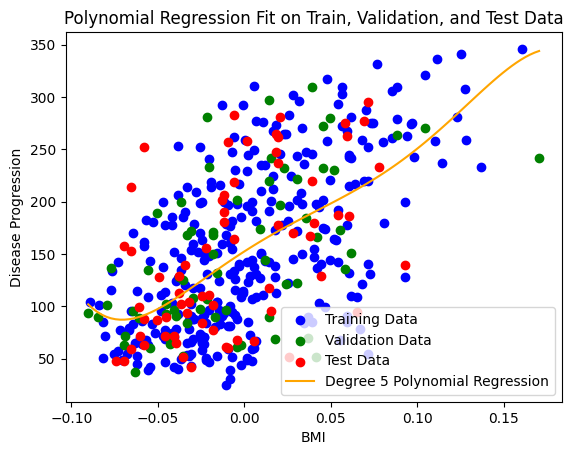

In [ ]:

X_bmi = df[['bmi']].values
y = df['target'].values

best_degree = np.argmin(metrics_val['MAPE'])

poly = PolynomialFeatures(degree=best_degree)
X_poly = poly.fit_transform(X_bmi)

X_train_poly, X_temp_poly, y_train, y_temp = train_test_split(X_poly, y, test_size=0.3, random_state=42)
X_val_poly, X_test_poly, y_val, y_test = train_test_split(X_temp_poly, y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train_poly, y_train)

X_range = np.linspace(X_bmi.min(), X_bmi.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

y_train_pred = model.predict(X_train_poly)
y_val_pred = model.predict(X_val_poly)
y_test_pred = model.predict(X_test_poly)
y_range_pred = model.predict(X_range_poly)

plt.scatter(X_train_poly[:, 1], y_train, label='Training Data', color='blue')
plt.scatter(X_val_poly[:, 1], y_val, label='Validation Data', color='green')
plt.scatter(X_test_poly[:, 1], y_test, label='Test Data', color='red')

plt.plot(X_range, y_range_pred, label=f'Degree {best_degree} Polynomial Regression', color='orange')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Polynomial Regression Fit on Train, Validation, and Test Data')
plt.show()


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


# Extract the BMI feature and target variable
X_bmi = df[['bmi']].values
y = df['target'].values

degrees = np.arange(6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_bmi)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Get the feature names after polynomial transformation
    feature_names = poly.get_feature_names_out(input_features=['bmi'])

    # Print the number of trainable parameters for each degree
    print(f"Degree {degree}: Number of Trainable Parameters = {len(feature_names)}")


Degree 0: Number of Trainable Parameters = 1
Degree 1: Number of Trainable Parameters = 2
Degree 2: Number of Trainable Parameters = 3
Degree 3: Number of Trainable Parameters = 4
Degree 4: Number of Trainable Parameters = 5
Degree 5: Number of Trainable Parameters = 6
